# OBJETIVO DA ANÁLISE
O objetivo desta análise é apresentar um passo a passo detalhado da exploração da base de dados "Churn.csv", incluindo processos de limpeza e tratamento dos dados, preparando-os para a aplicação de um modelo futuro.

# BIBLIOTECAS

In [46]:
#importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt

# FUNÇÕES

In [47]:
#detectar_valores_nulos

def detectar_valores_nulos(df):

    """
    Função para detectar colunas com valores nulos, calcular a quantidade e a porcentagem de valores nulos.

    Parâmetros:
    df (DataFrame): O DataFrame que contém os dados.

    Retorna:
    df_nulos (DataFrame): Um DataFrame contendo as colunas com valores nulos, a quantidade de nulos e a porcentagem de nulos.
    """

    #calcular o total de valores nulos por coluna
    total_nulos = df.isnull().sum().sort_values(ascending=False)

    #filtrar as colunas que possuem valores nulos
    colunas_com_nulos = total_nulos[total_nulos > 0]

    #calcular a porcentagem de valores nulos por coluna
    porcentagem_nulos = (df.isnull().sum() / len(df)) * 100

    #criar o DataFrame com as informações de valores nulos
    df_nulos = pd.DataFrame({
        'Colunas': colunas_com_nulos.index,
        'Qtde Nulos': colunas_com_nulos.values,
        'Porcentagem Nulos': porcentagem_nulos[colunas_com_nulos.index].values
    })

    return df_nulos


#detectar_outliers

def detectar_outliers(df, coluna):

    """
    Função para detectar outliers usando o método do IQR (Interquartile Range).

    Parâmetros:
    df (DataFrame): O DataFrame que contém os dados.
    coluna (str): O nome da coluna na qual detectar os outliers.

    Retorna:
    outliers (DataFrame): Um DataFrame contendo os valores outliers da coluna especificada.
    """

    #calcular primeiro e terceiro quartis
    q1 = df[coluna].quantile(0.25)
    q3 = df[coluna].quantile(0.75)

    #calcular o intervalo interquartil
    iqr = q3 - q1

    #definir limites inferior e superior para outliers
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    #identificar outliers
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]

    print("Outliers detectados:")
    print(outliers[[coluna]])

    return outliers

#tratar_outliers

def tratar_outliers(df, coluna):

    """
    Trata os outliers na coluna especificada do DataFrame fornecido, substituindo-os pela mediana.

    Parâmetros:
    df (pd.DataFrame): DataFrame contendo a coluna a ser tratada.
    coluna (str): Nome da coluna em que os outliers devem ser tratados.

    Retorna:
    pd.DataFrame: DataFrame com os outliers na coluna especificada substituídos pela mediana.
    """

    #calcular primeiro e terceiro quartis
    q1 = df[coluna].quantile(0.25)
    q3 = df[coluna].quantile(0.75)

    #calcular o intervalo interquartil
    iqr = q3 - q1

    #definir limites inferior e superior para outliers
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    #calcular a mediana da coluna especificada
    mediana_coluna = df[coluna].median()

    #substituir outliers pela mediana
    df[coluna] = np.where(
        (df[coluna] < limite_inferior) | (df[coluna] > limite_superior),
        mediana_coluna,
        df[coluna]
    )

    return df

# BASE DE DADOS

In [48]:
#importando dados
df = pd.read_csv('Churn.csv', sep = ';')
df

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


Logo de início, observamos que a base de dados foi importada sem os nomes das colunas. Corrigir essa questão será o primeiro passo a ser realizado.

In [49]:
#renomeando colunas da base de dados
df.columns = ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito",
                    "Ativo","Salario","Saiu"]

df.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


Pronto! Essa simples correção já tornou o entendimento da base de dados muito mais claro.

Para dar continuidade à análise, vamos remover algumas colunas que não serão utilizadas neste projeto.

In [50]:
#removendo as colunas 'Patrimonio', 'Produtos', 'TemCartCredito', 'Ativo' e 'Saiu'
df = df.drop(['Patrimonio', 'Produtos', 'TemCartCredito', 'Ativo', 'Saiu'], axis=1)
df

,Id,Score,Estado,Genero,Idade,Saldo,Salario
0,1,619,RS,Feminino,42,0,10134888.0
1,2,608,SC,Feminino,41,8380786,11254258.0
2,3,502,RS,Feminino,42,1596608,11393157.0
3,4,699,RS,Feminino,39,0,9382663.0
4,5,850,SC,Feminino,43,12551082,790841.0
...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,12310588,14576583.0
995,997,610,SC,Masculino,29,0,8391224.0
996,998,811,SC,Masculino,44,0,7843973.0
997,999,587,SC,Masculino,62,12128627,677692.0


Com as correções concluídas, agora temos as variáveis da base de dados prontas para a realização das análises exploratórias.

Antes de prosseguir, é importante observar a base de dados, verificando o tipo das variáveis e a possível presença de valores nulos. Esta pré-visualização ajudará a seguir com a análise exploratória.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 998
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       998 non-null    int64  
 1   Score    998 non-null    int64  
 2   Estado   998 non-null    object 
 3   Genero   998 non-null    object 
 4   Idade    998 non-null    int64  
 5   Saldo    998 non-null    int64  
 6   Salario  998 non-null    float64
dtypes: float64(1), int64(4), object(2)
memory usage: 62.4+ KB


Podemos observar que a base de dados contém valores nulos, que iremos tratar posteriormente. As colunas são do tipo int, float (numéricas) e object (categóricas).

Agora, sem mais enrolação, vamos para a etapa de análise exploratória. Iremos dividir as variáveis em numéricas e categóricas para tornar a sequência mais clara e objetiva.

# ANÁLISE EXPLORATÓRIA DE VARIÁVEIS CATEGÓRICAS

In [52]:
#gerando dataframe com as variáveis categóricas de df
dfcat = df.select_dtypes(include='object')
dfcat

,Estado,Genero
0,RS,Feminino
1,SC,Feminino
2,RS,Feminino
3,RS,Feminino
4,SC,Feminino
...,...,...
994,SC,Masculino
995,SC,Masculino
996,SC,Masculino
997,SC,Masculino


Podemos observar duas variáveis categóricas: 'Estado' e 'Genero'. Vamos realizar uma contagem das classes que essas variáveis podem assumir para analisar sua distribuição.

**Estado**

In [53]:
agrupado_estado = df.groupby(['Estado']).size()
agrupado_estado

,0
Estado,
PR,257
RP,1
RS,478
SC,258
SP,4
TD,1


O domínio dos dados deve conter apenas os estados da região Sul do Brasil (RS, SC, PR). No entanto, verificamos a presença de categorias fora desse domínio (SP, RP, TD).

**Gênero**

In [54]:
agrupado_genero = df.groupby(['Genero']).size()
agrupado_genero

,0
Genero,
F,2
Fem,1
Feminino,461
M,6
Masculino,521


Neste caso, fica explicito que o domínio dos dados deveria incluir apenas as categorias 'Masculino' e 'Feminino'. No entanto, encontramos categorias fora do domínio (F, Fem, M), que claramente se referem às duas categorias principais, mas foram registradas de forma diferente.

# ANÁLISE EXPLORATÓRIA DE VARIÁVEIS NUMÉRICAS

In [55]:
#gerando dataframe com as variáveis numéricas de df
numdf = df.select_dtypes(include='number')
numdf = numdf.drop(['Id'], axis=1)
numdf

,Score,Idade,Saldo,Salario
0,619,42,0,10134888.0
1,608,41,8380786,11254258.0
2,502,42,1596608,11393157.0
3,699,39,0,9382663.0
4,850,43,12551082,790841.0
...,...,...,...,...
994,838,43,12310588,14576583.0
995,610,29,0,8391224.0
996,811,44,0,7843973.0
997,587,62,12128627,677692.0


Podemos observar quatro variáveis numéricas: 'Score', 'Idade', 'Saldo' e 'Salario'. Vamos calcular as estatísticas descritivas e criar um boxplot para cada uma delas, a fim de compreender melhor a distribuição dos dados.

**Estatísticas descritivas**

In [56]:
numdf.describe()

,Score,Idade,Saldo,Salario
count,999.000000,999.000000,9.990000e+02,9.920000e+02
mean,648.621622,38.902903,7.164928e+06,3.528762e+07
std,98.264219,11.401912,6.311840e+06,5.305800e+08
min,376.000000,-20.000000,0.000000e+00,9.677000e+03
25%,580.000000,32.000000,0.000000e+00,3.029011e+06
50%,653.000000,37.000000,8.958835e+06,8.703250e+06
75%,721.000000,44.000000,1.258684e+07,1.405213e+07
max,850.000000,140.000000,2.117743e+07,1.193469e+10


**Boxplot**

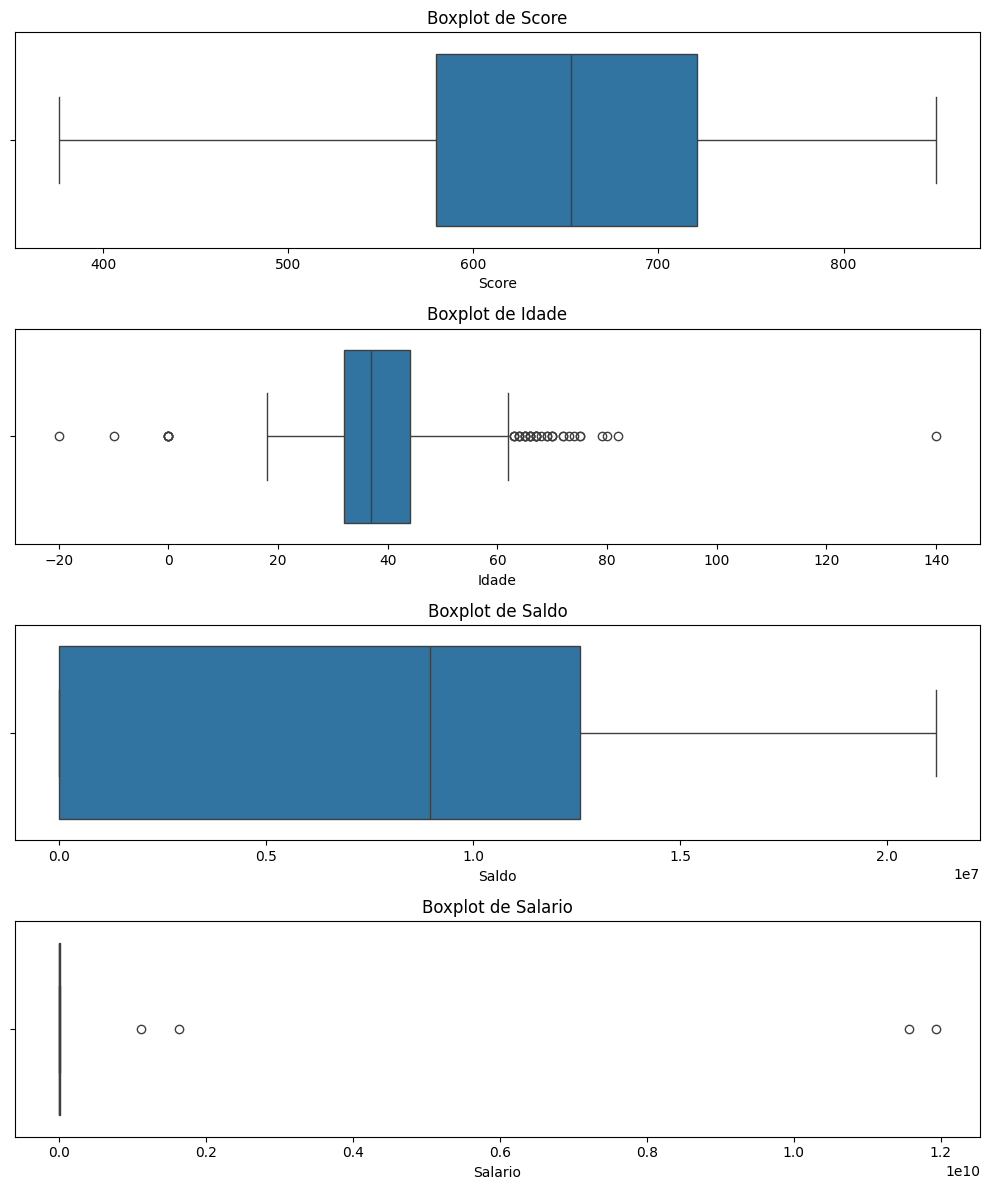

In [57]:
#definir as variáveis
variaveis = ['Score', 'Idade', 'Saldo', 'Salario']

#criar o painel de gráficos
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 12))

#iterar sobre as variáveis e plotar apenas boxplots
for i, var in enumerate(variaveis):
    # Boxplot
    sns.boxplot(x=numdf[var], ax=axs[i])
    axs[i].set_title(f'Boxplot de {var}')
    axs[i].set_xlabel(var)

#ajustar o layout
plt.tight_layout()
plt.show()

Para a variável 'Score', não foram identificados problemas aparentes. No caso da 'Idade', é necessário tratar os valores que estão fora do domínio esperado. A variável 'Saldo' também não apresenta problemas evidentes. No entanto, para o 'Salário', foram identificados possíveis outliers que precisam ser investigados.

# VALORES NULOS

**Identificação das categorias com valores nulos**

In [58]:
#visualizando valores nulos de df utilizando a função "detectar_valores_nulos"
detectar_valores_nulos(df)

,Colunas,Qtde Nulos,Porcentagem Nulos
0,Genero,8,0.800801
1,Salario,7,0.700701


Observamos que as variáveis 'Genero' e 'Salario' possuem valores faltantes. Em ambos os casos, a quantidade de valores ausentes representa menos de 1% do total dos dados.

Para corrigir este problema, faremos substituições simples. A variável 'Genero', sendo categórica, será preenchida com a moda, enquanto 'Salario', sendo numérica, será preenchida com a mediana.

**Tratamento dos valores faltantes**

In [61]:
#substituindo os valores faltantes de 'Salário' pela mediana
df['Salario'].fillna(df['Salario'].median(), inplace=True)

#substituindo os valores faltantes de 'Genero' pela moda
df['Genero'].fillna(df['Genero'].mode()[0], inplace=True)

#verificando se ainda existem valores nulos
detectar_valores_nulos(df) #corrigido

,Colunas,Qtde Nulos,Porcentagem Nulos


# DADOS DUPLICADOS

In [62]:
#buscando dados duplicados pelo Id
df.loc[df['Id'].duplicated()]

,Id,Score,Estado,Genero,Idade,Saldo,Salario
81,81,665,RS,Feminino,34,9664554,17141366.0


Foi detectado que o ID 81 está duplicado. Para corrigir esse problema, vamos remover a observação duplicada da base de dados.

In [63]:
#excluindo pelo Id
df.drop_duplicates(subset="Id", keep='first',inplace=True)

#buscando duplicados
df[df.duplicated(['Id'],keep=False)] #corrigido

,Id,Score,Estado,Genero,Idade,Saldo,Salario


# TRATAMENTO DE VARIÁVEIS CATEGÓRICAS


**Estado**

Vamos substituir os estados fora do domínio pela moda (RS).

In [64]:
#substituindo valores fora do domínio pela moda (RS)
df.loc[df['Estado'].isin( ['RP','SP','TD']), 'Estado'] = df['Estado'].mode()[0]

#verificando resultado
agrupado_estado = df.groupby(['Estado']).size()
agrupado_estado #corrigido

,0
Estado,
PR,257
RS,483
SC,258


**Gênero**

Vamos transformar as categorias 'F' e 'Fem' em 'Feminino', e 'M' em 'Masculino'.

In [36]:
#padronizando gênero de acordo com o dominio (Masculino, Feminino)
df.loc[df['Genero'] ==  'M', 'Genero'] = "Masculino"
df.loc[df['Genero'].isin( ['Fem','F']), 'Genero'] = "Feminino"

#visualizando o resultado
agrupado_genero = df.groupby(['Genero']).size()
agrupado_genero #corrigido

,0
Genero,
Feminino,463
Masculino,535


Agora que as categorias das variáveis categóricas foram ajustadas, vamos para o tratamento das colunas numéricas.

# TRATAMENTO DE VARIÁVEIS NUMÉRICAS

**Idade**

Vamos considerar que as idades vão variar entre 0 e 120 anos.

In [ ]:
#visualizando idades fora do domínio esperado.
df.loc[(df['Idade'] <  0 )  | ( df['Idade'] >  120) ]

,Id,Score,Estado,Genero,Idade,Saldo,Salario
867,869,636,RS,Feminino,-10,17083346,11051028.0
984,986,773,RS,Masculino,-20,12453278,1172357.0
990,992,655,RS,Masculino,140,93147,6621413.0


Foram identificados 3 valores fora do domínio. Para corrigir este problema, vamos substituir esses valores pela mediana da variável.

In [65]:
#substituindo valores fora do domínio pela mediana da variável 'Idade'
df.loc[(df['Idade'] <  0 )  | ( df['Idade'] >  120), 'Idade'] = sts.median(df['Idade'])

#verificamos se ainda existem idades fora do domínio
df.loc[(df['Idade'] <  0 )  | ( df['Idade'] >  120) ] #corrigido

,Id,Score,Estado,Genero,Idade,Saldo,Salario


Por fim, para que todas as variáveis numéricas estejam ajustadas, resta apenas lidar com os outliers presentes na coluna 'Salário'.

# OUTLIERS

**Identificação valores outliers**

Vamos utilizar a função detectar_outliers para identificar e visualizar os valores outliers presentes na variável 'Salario'.

In [66]:
#visualizando outliers da variável 'Salario'
detectar_outliers(df, 'Salario');

Outliers detectados:
          Salario
7    1.193469e+10
116  1.156383e+10
170  1.640179e+09
230  1.119812e+09


Podemos observar que existem 4 valores outliers na variável 'Salario'. Vamos tratar esses outliers substituindo-os pela mediana da variável.

**Tratamendo dos valores outliers**

Vamos substituir os valores outliers da variável 'Salario' pela mediana dos dados da coluna utilizando a função tratar_outliers.


Text(0.5, 1.0, 'Salario')

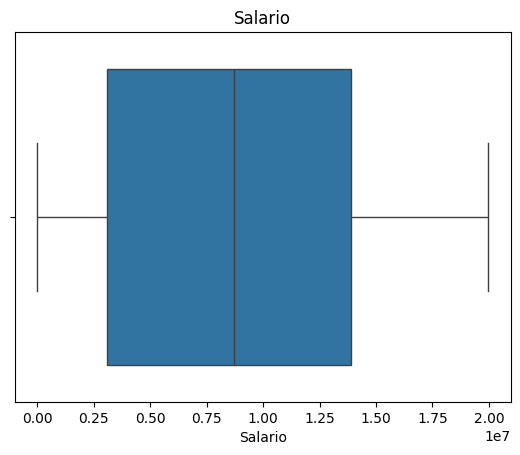

In [67]:
#substituindo valores outliers da coluna 'Salario'
tratar_outliers(df, 'Salario')

#verificando resultado pelo boxplot
sns.boxplot(x=df['Salario']).set_title('Salario') #outliers não detectados

Fim! Todos os problemas detectados foram corrigidos!